Matemática Computacional III - UFSM - 2023/1


# Série de Taylor


Dada uma função derivável $f$, a expansão em série de Taylor dessa função é uma representação de $f$ através de uma série infinita de polinômios. Definimos a **série de Taylor de uma função $f(x)$ em torno do ponto $x=a$** como:

$$ f(x) = \sum_{n = 0}^{\infty} f^{(n)}(a)\frac{(x-a)^n}{n!},
$$

onde $f^{(n)}$ é a n-ésima derivada de $f$ e $f^{(0)}$ é a própria função $f$. 

Assim, a forma expandida fica

$$f(x)= f(a)+f^{(1)}(a)(x-a)+ f^{(2)}(a)\frac{(x-a)^2}{2!}+f^{(3)}(a)\frac{(x-a)^3}{3!}+\cdots$$

## Exemplo 1

Calcule a expansão da série de Taylor para $f(x) = 3x^2 + 2x + 1$ em torno de $a = 0$ e $a = 1$. Verifique que $f$ e suas expansões são idênticas.

Calculando as derivadas:

\begin{eqnarray*}
f^{(0)}(x) &=& 3x^2 + 2x + 1\\
f^{(1)}(x) &=& 6x + 2\\
f^{(2)}(x)&=& 6\\
f^{(3)}(x)&=& 0\\
f^{(4)}(x)&=& 0\\
\end{eqnarray*}
$$\vdots$$

Calculando os termos da série em torno de $a = 0$:
\begin{eqnarray*}
f(x) &=& f^{(0)}(0)+f^{(1)}(0)\frac{(x-0)^1}{1!}+ f^{(2)}(0)\frac{(x-0)^2}{2!}+0+0\cdots \\[8pt]
&=&1+\frac{2(x-0)}{1!}+\frac{6(x-0)^2}{2!}+0+0+\cdots\\[12pt]
&=&3x^2+2x+1
\end{eqnarray*}

Calculando os termos da série em torno de $a = 1$:
\begin{eqnarray*}
f(x) &=& f^{(0)}(1)+f^{(1)}(1)\frac{(x-1)^1}{1!}+ f^{(2)}(1)\frac{(x-1)^2}{2!}+\cdots \\[5pt]
&=& 6 +\frac{8(x-1)}{1!}+\frac{6(x-1)^2}{2!}+ 0 + 0 + \cdots\\[5pt]
&=& 3x^2 + 2x + 1\\[5pt]
\end{eqnarray*}

<br>


<u>CONCLUSÃO:</u> Assim

<br>
<br>
<br>

## Exemplo 2 

Escreva a série de Taylor da função $f(x) = sen(x)$ em torno do ponto $a = 0$: 

\begin{eqnarray*}
f(x) &=& f^{(0)}(0) + f^{(1)}(0)\frac{(x-0)^1}{1!} + f^{(2)}(0)\frac{(x-0)^2}{2!} + f^{(3)}(0)\frac{(x-0)^3}{3!} + f^{(4)}(0)\frac{(x-0)^4}{4!} + \ldots \\[8pt]
&=& 0 + \frac{1(x-0)}{1!} + \frac{-0(x-0)^2}{2!} + \frac{-1(x-0)^3}{3!} + \frac{0(x-0)^4}{4!} + \ldots \\[12pt]
&=& \frac{1x}{1!} - \frac{1x^3}{3!} + \ldots \\[12pt]
\end{eqnarray*}

ou, de forma compacta,

$$f(x) = \sum_{n = 0}^{\infty} \frac{(-1)^n x^{2n+1}}{(2n+1)!}.$$

Observe que nessa fórmula, os termos de potências pares na série de Taylor são ignorados. Assim, quando $n$ corre sobre os valores $1, 2, 3, 4,\ldots$ obtemos termos sempre de potência ímpar.

<br>
<br>
<br>

## Obtendo a série de Taylor com SymPy

Vamos agora usar a biblioteca de matemática simbólica SymPy para resolver computacionalmente os dois exemplos anteriores. Com SymPy é possível definir variáveis e fazer contas com elas (e não apenas com números).


Primeiramente, importamos a biblioteca, iniciamos o modo de impressão e definimos as variáveis. Isso é feito como nas três linhas a seguir.

In [ ]:
import sympy as sp
sp.init_printing(use_unicode=True)
x, a = sp.symbols("x, a", real=True)

Vamos definir a função do **Exemplo 1** e obter suas derivadas com a função `sp.diff`:

In [ ]:
f0 = 3*a**2 + 2*a + 1
f1 = sp.diff(f0, a)    # primeira derivada
f2 = sp.diff(f1, a)    # segunda derivada
df = (f0, f1, f2)

print("Derivadas: ")
df

Derivadas: 


⎛   2                      ⎞
⎝3⋅a  + 2⋅a + 1, 6⋅a + 2, 6⎠

Agora vamos escrever a série de Taylor em torno do ponto $a$:

In [ ]:
s = 0
for n in range(len(df)):
    s += df[n]*(x-a)**n / sp.factorial(n)    # pare um instante e identifique o que significa cada um desses termos
s

   2                   2                         
3⋅a  + 2⋅a + 3⋅(-a + x)  + (-a + x)⋅(6⋅a + 2) + 1

Substituindo $a=0$ e simplificando, obtemos a série de Taylor da função em torno de $x=0$: 

In [ ]:
a = 0
sp.simplify(s)

   2          
3⋅x  + 2⋅x + 1

Por fim, fazendo o mesmo para $a=1$ e simplificando, obtemos a série de Taylor da função em torno de $x=1$: 

In [ ]:
a = 1
sp.simplify(s)

   2          
3⋅x  + 2⋅x + 1

<br><br>

Para finalizar essa seção, vamos usar SymPy para resolver o **Exemplo 2**.

In [ ]:
x, a = sp.symbols("x, a", real=True)
f = sp.sin(a)
s = 0

for n in range(6):                       # vamo considerar apenas os 6 primeiros termos da série
    s += f*(x-a)**n / sp.factorial(n)    # pare um instante e identifique o que significa cada expressão
    f = sp.diff(f, a)
sp.simplify(s)

                         5                 4                 3                
                  (a - x) ⋅cos(a)   (a - x) ⋅sin(a)   (a - x) ⋅cos(a)   (a - x
(-a + x)⋅cos(a) - ─────────────── + ─────────────── + ─────────────── - ──────
                        120                24                6                

 2                
) ⋅sin(a)         
───────── + sin(a)
 2                

Substituindo o valor de $a$ para obter a série de Taylor em torno de $x=0$:

In [ ]:
s.subs(a,0)

  5    3    
 x    x     
─── - ── + x
120   6     

<br><br>

Agora que entendemos como construir computacionalmente cada passo, podemos utilizar a função `sp.series`, que calcula automaticamente a série de Taylor até um certo número de termos em torno de um valor dado:

In [ ]:
f = sp.sin(x)
a = 0
ntermos = 7
sp.series(f, x, a, ntermos)

     3     5        
    x     x     ⎛ 7⎞
x - ── + ─── + O⎝x ⎠
    6    120        

**Exercício 1: Verifique que para a função $f(x) = cos(x)$ os primeiros termos da série de Taylor são distintos se utilizamos diferentes valores de $a$.**

In [ ]:
# resolva aqui o exercício
f = sp.cos(x)
a = 0 
ntermos = 7
sp.series(f, x, a, ntermos)

     2    4     6        
    x    x     x     ⎛ 7⎞
1 - ── + ── - ─── + O⎝x ⎠
    2    24   720        

In [ ]:
f = sp.cos(x)
a = 1
ntermos = 7
sp.series(f, x, a, ntermos)

                                 2                 3                 4        
                          (x - 1) ⋅cos(1)   (x - 1) ⋅sin(1)   (x - 1) ⋅cos(1) 
cos(1) - (x - 1)⋅sin(1) - ─────────────── + ─────────────── + ─────────────── 
                                 2                 6                 24       

         5                 6                            
  (x - 1) ⋅sin(1)   (x - 1) ⋅cos(1)    ⎛       7       ⎞
- ─────────────── - ─────────────── + O⎝(x - 1) ; x → 1⎠
        120               720                           

<br><br><br>

## Aproximação de funções por série de Taylor

# Muitas vezes é útil representar uma função usando a série de Taylor com um número limitado de termos. Dessa forma é possível obter uma aproximação para a função na vizinhanca do ponto em torno do qual a serie de Taylor é desenvolvida. 

Por exemplo, podemos facilmente obter aproximações para a função $f(x)=e^x$ em torno de $a=0$, pois as derivadas dessa função em $a=0$ são simples:

\begin{align}
f^{(1)}(x)=e^x \ \ &\implies \ \  f^{(1)}(0) = 1 \\
f^{(2)}(x)=e^x \ \ &\implies \ \  f^{(2)}(0) = 1 \\
f^{(3)}(x)=e^x \ \ &\implies \ \  f^{(3)}(0) = 1 \\
&\vdots
\end{align}

Logo, a série de Taylor para $e^x$ em torno de $a=0$ tem a forma:

\begin{align}
e^x &= f^{(0)}(0) + f^{(1)}(0)\frac{(x-0)^1}{1!} + f^{(2)}(0)\frac{(x-0)^2}{2!} + f^{(3)}(0)\frac{(x-0)^3}{3!} + f^{(4)}(0)\frac{(x-0)^4}{4!} + \ldots \\ 
&= 1 + x + \frac{x^2}{2!}+ \frac{x^3}{3!}+\frac{x^4}{4!}+\cdots
\end{align}

<br>

Assim, truncando a série a partir do 4º termo, podemos aproximar $e^x$ nos valores de $x$ próximos a $a=0$ usando o polinômio obtido da série de Taylor. 

Por exemplo, vamos calcular uma aproximação para o número $\sqrt{e} = e^{\frac{1}{2}}$ utilizando os quatro primeiros termos da série:

In [ ]:
# calcule aqui a aproximação
s = 1 + 1/2 + ((1/2)**2)/sp.factorial(2) + ((1/2)**3)/sp.factorial(3) + ((1/2)**4)/sp.factorial(4)
print("Resultado:", s)

Resultado: 1.64843750000000


Obtemos 

$$e^{\frac12} \approx 1 + 1/2 + \frac{(\frac{1}{2})^2}{2!} + \frac{(\frac{1}{2})^3}{3!} +\frac{(\frac{1}{2})^4}{4!}  = 1.6487212.$$

O valor fornecido por uma calculadora é $e^{\frac12}=1.6487212707001282$. Assim, o erro relativo cometido na aproximação acima é aproximadamente $0.0029$, ou seja, na ordem de $0.17\%$ da solução exata. 

Podemos verificar facilmente que quanto mais termos da série são utilizados na aproximação, menor é o erro. Além disso, para um mesmo número de termos da série, quanto mais próximo $x$ estiver de $0$, melhor será a aproximação. 

<br><br>

Vamos agora usar Python para realizar alguns experimentos numéricos. Primeiramente vamos criar um pequeno programa com um laço `for` para obter algumas aproximações de $e^{0.5}$ pela série de Taylor com número de termos variando de 1 a 10. (Caso alguma parte do código não esteja clara, crie um novo bloco de código e explore-o, modificando os valores e vendo o que acontece.)

In [ ]:
x = 0.5
soma = 0
fatorial = 1

for n in range(10):
    soma += x**n / fatorial    # pare um instante e identifique o que cada expressão significa nesse laço
    fatorial *= n + 1
    
    print('Série com', n + 1, 'termos:', soma)

Série com 1 termos: 1.0
Série com 2 termos: 1.5
Série com 3 termos: 1.625
Série com 4 termos: 1.6458333333333333
Série com 5 termos: 1.6484375
Série com 6 termos: 1.6486979166666667
Série com 7 termos: 1.6487196180555554
Série com 8 termos: 1.6487211681547618
Série com 9 termos: 1.6487212650359622
Série com 10 termos: 1.648721270418251


É possível notar que quanto maior o número de termos, mais o resultado da série de Taylor  se aproxima do valor exato de $e^x$.



<br><br><br>

## Gráfico das aproximações por série de Taylor 

Agora vamos escrever explicitamente os polinômios obtidos na série de Taylor de $f(x)=e^x$ com 2, 3, 4 e 5 termos e fazer os seus gráficos para comparação.

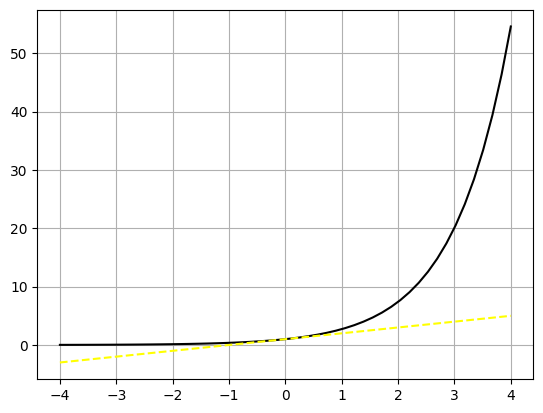

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

s2 = 1 + x     # série de Taylor truncada no 2o termo
x = np.linspace(-4, 4)
y = np.exp(x)
plt.plot(x, y, color='black')
plt.plot(x, s2, '--', color='yellow')
plt.grid()
plt.show()

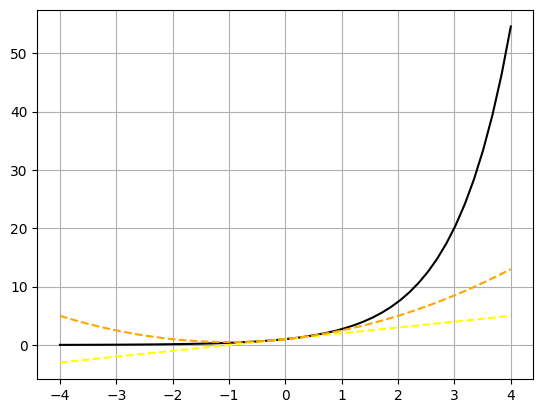

In [ ]:
s3 = 1 + x + (x)**2/sp.factorial(2)     # série de Taylor truncada no 3o termo
plt.plot(x, y, color='black')
plt.plot(x, s2, '--', color='yellow')
plt.plot(x, s3, '--', color='orange')
plt.grid()
plt.show()

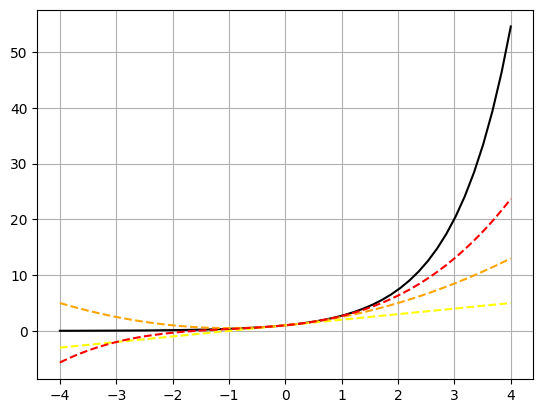

In [ ]:
s4 = 1 + x + (x)**2/sp.factorial(2) + (x)**3/sp.factorial(3)    # série de Taylor truncada no 4o termo
plt.plot(x, y, color='black')
plt.plot(x, s2, '--', color='yellow')
plt.plot(x, s3, '--', color='orange')
plt.plot(x, s4, '--', color='red')
plt.grid()
plt.show()

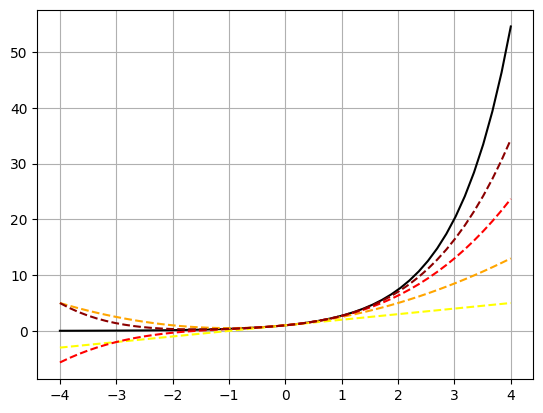

In [ ]:
s5 = 1 + x + (x)**2/sp.factorial(2) + (x)**3/sp.factorial(3) + (x)**4/sp.factorial(4)   # série de Taylor truncada no 5o termo
 
plt.plot(x, y, color='black')
plt.plot(x, s2, '--', color='yellow')
plt.plot(x, s3, '--', color='orange')
plt.plot(x, s4, '--', color='red')
plt.plot(x, s5, '--', color='darkred')
plt.grid()
plt.show()

<br><br><br>

## Exemplo 3

Vamos obter a série de Taylor para a função $f(x)=cos(x)$ em torno de $a=0$ e verificar quantos termos precisam ser retidos para aproximar $cos(0.5)$ com um erro relativo menor que $\epsilon=0.0001$.

Utilize os códigos acima para obter os primeiros 9 termos da série de Taylor para a função $cos(x)$ em torno de $a=0$. 

In [ ]:
# copie e modifique os códigos aqui
x, a = sp.symbols("x, a", real=True)
f = sp.cos(x)
a = 0
ntermos = 11
sp.series(f, x, a, ntermos)

     2    4     6      8       10           
    x    x     x      x       x        ⎛ 11⎞
1 - ── + ── - ─── + ───── - ─────── + O⎝x  ⎠
    2    24   720   40320   3628800         

Chega-se a: 

\begin{align}
\cos \left( x \right) &= 1 - \frac{x^2}{2} + \frac{x^4}{24} - \frac{x^6}{720} + \frac{x^8}{40320} - \frac{x^{10}}{3628800} \ + \ ...\\
&= \sum\limits_{n = 0}^\infty (-1)^n\frac{x^{2n}}{(2n)!}
\end{align}

Observe que os termos de potência ímpar são anulados na série de Taylor. Assim, a série acima foi escrita de modo que cada valor de $n$ corresponde sempre a uma potências par.

Vamos agora usar Python para gerar as aproximações, somando um termo de cada vez e calculando o erro relativo até atingir a precisão desejada. No código abaixo criamos a variável `soma` para armazenar o resultado da série.

In [ ]:
x = 0.5
soma = 0
err = 1
n = 0

while err > 0.0001:
    soma += (-1)**n * x**(2*n) / np.math.factorial(2*n)    # identifique o significado de cada expressão nesse loop
    err = abs(np.cos(x) - soma) / abs(np.cos(x))
    n += 1
    print('Série de Taylor com', 2*n + 1, 'termos:', soma)
    
print('Valor de np.cos(0.5):', np.cos(0.5))
print('Erro relativo:', err)

Série de Taylor com 3 termos: 1.0
Série de Taylor com 5 termos: 0.875
Série de Taylor com 7 termos: 0.8776041666666666
Valor de np.cos(0.5): 0.8775825618903728
Erro relativo: 2.461851138807129e-05


Para finalizar o exemplo, vamos fazer o gráfico de dos polinômios obtidos truncando a série de Taylor com 3, 5 e 7 termos (lembre que os termos pares são todos nulos).

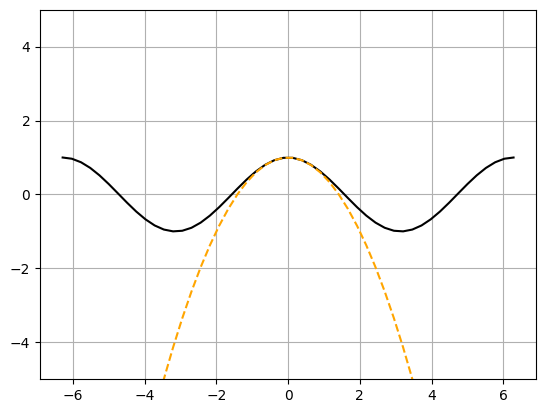

In [ ]:
x = np.linspace(-2*np.pi, 2*np.pi)
y = np.cos(x)
s3 = 1 - (x)**2/sp.factorial(2)   # série de Taylor truncada no 3o termo
plt.plot(x,y, color='black')
plt.plot(x, s3, '--', color='orange')
plt.ylim(-5, 5) 
plt.grid()
plt.show()

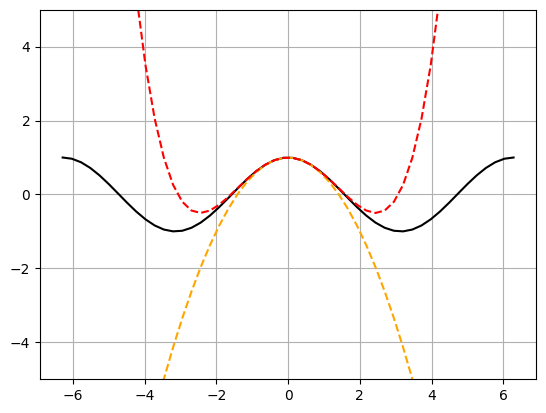

In [ ]:
s5 = 1 - (x)**2/sp.factorial(2) + x**4/sp.factorial(4) # série de Taylor truncada no 5o termo
plt.plot(x,y, color='black')
plt.plot(x, s3, '--', color='orange')
plt.plot(x, s5, '--', color='red')
plt.ylim(-5, 5) 
plt.grid()
plt.show()

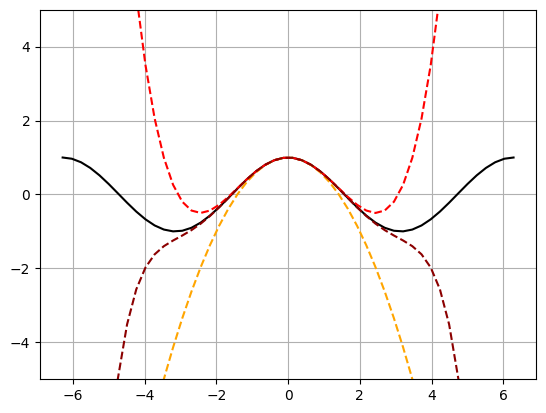

In [ ]:
s7 = 1 - (x)**2/sp.factorial(2) + x**4/sp.factorial(4) - (x)**6/sp.factorial(6)   # série de Taylor truncada no 7o termo
plt.plot(x,y, color='black')
plt.plot(x, s3, '--', color='orange')
plt.plot(x, s5, '--', color='red')
plt.plot(x, s7, '--', color='darkred')
plt.ylim(-5, 5) 
plt.grid()
plt.show()

**Observação:** 
Observe que todos os gráficos fornecem boas aproximações de $cos(x)$ em torno de $x=0$. Mas à medida que nos afastamos de $x=0$, os truncamentos com mais termos fornecem aproximações melhores. Isso fica mais evidente se plotarmos apenas valores de $x$ no intervalo $[-3,3]$. 

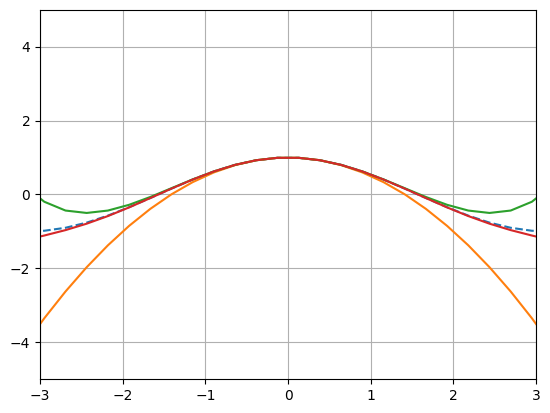

In [ ]:
plt.plot(x, y, '--', x, s3, x, s5, x, s7)
plt.ylim(-5, 5) 
plt.xlim(-3, 3) 
plt.grid()
plt.show()

<br><br><br>

## Aproximações lineares

Em muitos casos uma aproximação linear pode ser útil para analisar funções complicadas nas proximidades de um ponto. De fato, o gráfico de uma função derivável olhado bem de perto é similar a uma reta. 

Observe, por exemplo, como o gráfico da função $cos(x)$ se parece com uma reta se dermos um zoom grande o suficiente em torno de $x=0.5$.

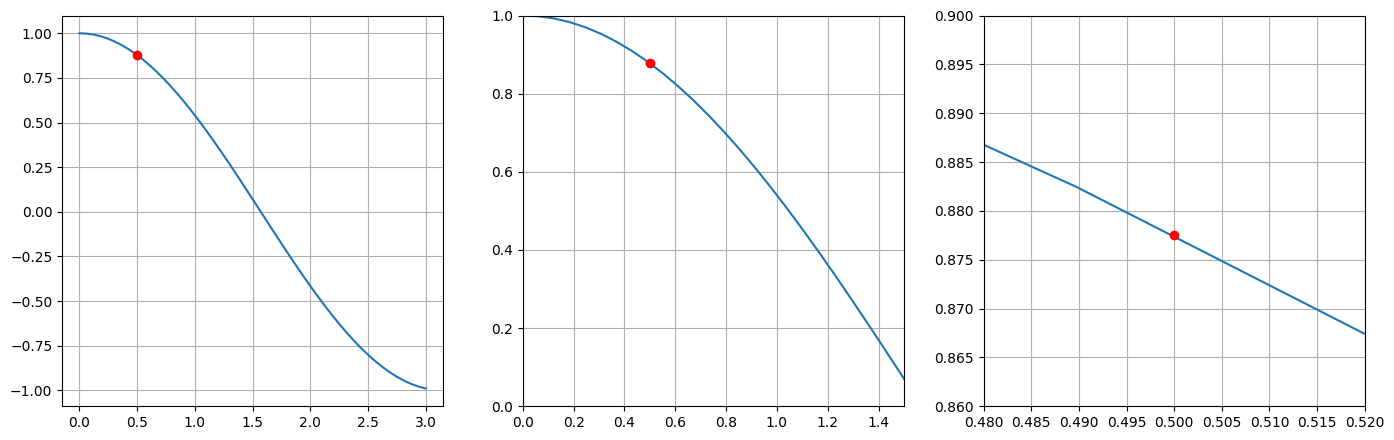

In [ ]:
x = np.linspace(0, 3)
y = np.cos(x)

plt.figure(figsize = (14, 4.5))
plt.subplot(1, 3, 1)
plt.plot(x, y, 0.5, np.cos(0.5),'o r')
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(x, y, 0.5, np.cos(0.5),'o r')
plt.grid()
plt.xlim(0, 1.5)
plt.ylim(0, 1)

plt.subplot(1, 3, 3)
plt.plot(x, y, 0.5, np.cos(0.5),'o r')
plt.grid()
plt.xlim(0.48, 0.52)
plt.ylim(0.86, 0.90)
plt.tight_layout()
plt.show()

**Exercício: Utilize o código anterior para evidenciar que o gráfico de $e^x$ em torno de $x=1.2$ parece um reta, se nos aproximarmos o suficiente desse ponto.**

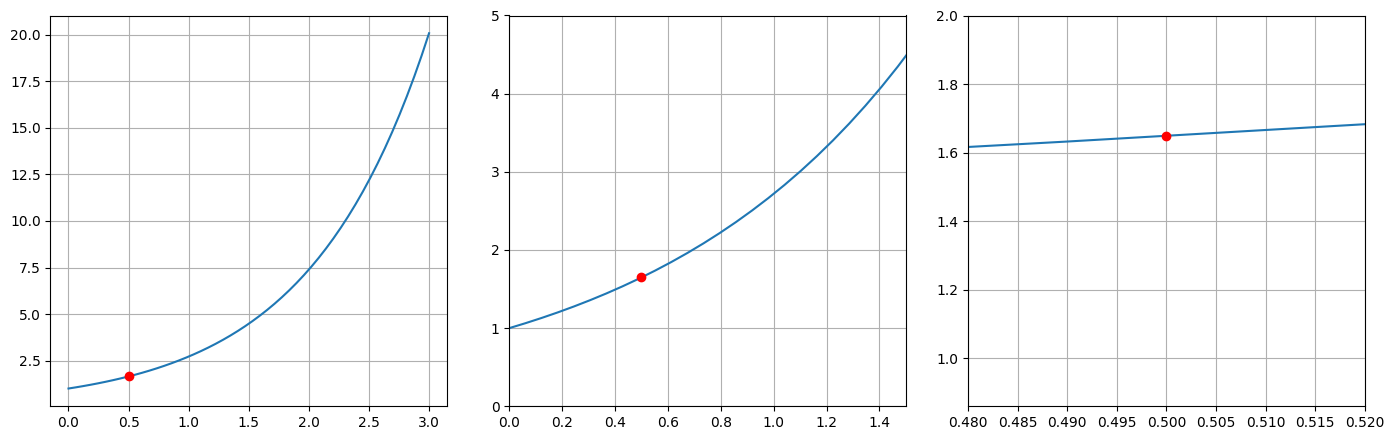

In [ ]:
# resolva o exercício aqui
x = np.linspace(0, 3)
y = np.exp(x)

plt.figure(figsize = (14, 4.5))
plt.subplot(1, 3, 1)
plt.plot(x, y, 0.5, np.exp(0.5),'o r')
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(x, y, 0.5, np.exp(0.5),'o r')
plt.grid()
plt.xlim(0, 1.5)
plt.ylim(0, 5)

plt.subplot(1, 3, 3)
plt.plot(x, y, 0.5, np.exp(0.5),'o r')
plt.grid()
plt.xlim(0.48, 0.52)
plt.ylim(0.86, 2)
plt.tight_layout()
plt.show()